In [1]:
import pandas as pd
import numpy as np

## Unsupervised Learning
- Training data is samples $ \{x^{(1)}, x^{(2)}, x^{(3)}, .. , x^{(n)}\} $ without labels. $ x^{(i)} \in \mathbb{R}^d $
- Clustering is a type of unsupervised learning technique where we assign data points to a group based on their similarity
   - e.g. market segmentation

#### Cluster labels as a feature
- Adding a feature of cluster labels can help machine learning models untangle complicated relationships of space or proximity.


### K-means Clustering

The k-means clustering algorithm is as follows:
 
1. **Initialize** cluster centroids $ \mu_1, \mu_2, ... , \mu_k $ randomly.

2. Repeat until convergence: {
    
    2.1. **Cluster assignment**
        For every data sample $i$, set
        $$ c(i) = {argmin}_{j} || x^{(i)} - \mu_j ||^2  $$
    2.2. **Centroid adjustment**
        For each centroid $j$, set
        $$ \mu_j = \frac{\sum_{i=1}^{n} 1\{c^{(i)}=j\}x^{(i)}}{\sum_{i=1}^{n}1\{c^{(i)}=j\}} $$

    }

#### Cost function: distortion function
K-means is guaranteed to converge. The cost function is called **distortion function**, and measures sum of squared distances between sample points and the cluster centroid to which they are assigned. K-means is exactly **coordinate descent** on J.

$$ J(c,\mu) = \sum_{i=1}^{n}||x^{(i)} - \mu_{c^{(i)}} ||^2 $$

##### Remarks
- In Step 2.1, we assign to each data point the cluster it belongs to by minimizing the squared distance from centroid. 
   - we repeatedly minimize J with respect to $c$ (distances) while keeping $\mu$ (centroids) fixed
- In Step 2.2, we adjust the centroids by taking average of the points that are that cluster. $1$ is an indicator function which outputs $0$ or $1$.
   - and then, minimize J with respect to $\mu$ (centroids) while keeping $c$ (distances) fixed.
- This implies that $J$ must monotonically decrease (converge) and so would $c$ and $\mu$ (usually converge but can oscillate between few clustering with same cost)
- Distortion function is **non-convex**, can get stuck in local minima
- **How to initialize centroids randomly? (Step 1)**
   - sample K points randomly from dataset and assign them as centroids
- **How to avoid local minima?** 
   - run k-means mulitple times (50 to 1000 times) with different random initializes
      - this removes the unlucky factor








In [30]:
# load iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

In [41]:
K = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

predicted_labels = kmeans.labels_ 
cluster_centers = kmeans.cluster_centers_

(2.0, 4.4)

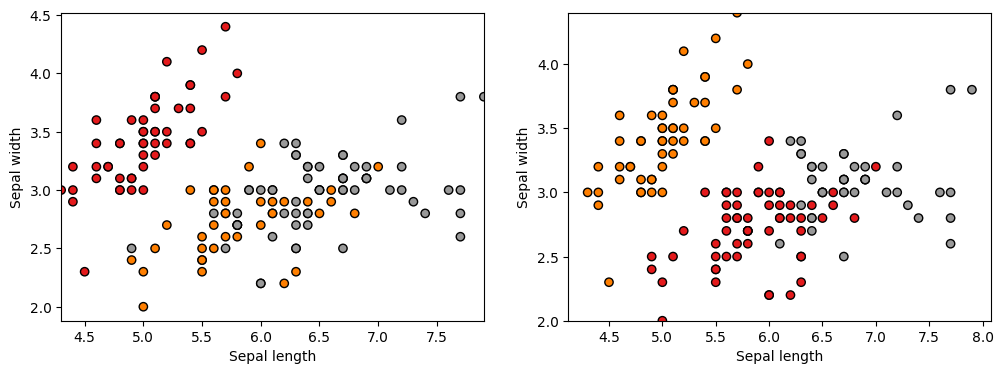

In [67]:
import matplotlib.pyplot as plt

labels = iris.target

# take first 2 features
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor="k")
ax2.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap=plt.cm.Set1, edgecolor="k")
ax1.set_xlabel("Sepal length")
ax1.set_ylabel("Sepal width")
ax2.set_xlabel("Sepal length")
ax2.set_ylabel("Sepal width")
ax1.set_xlim(X[:, 0].min(), X[:, 0].max())
ax2.set_ylim(X[:, 1].min(), X[:, 1].max())


/tmp/ipykernel_20418/899824869.py:20: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
/tmp/ipykernel_20418/899824869.py:22: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
/tmp/ipykernel_20418/899824869.py:24: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


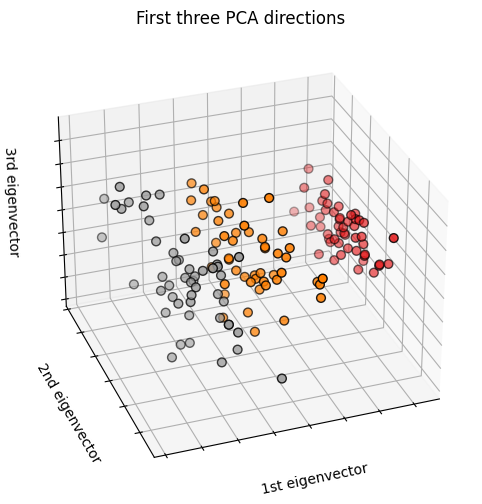

In [60]:
from sklearn.decomposition import PCA
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=labels,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## References

1. Stanford - Machine Learning - Andrew Ng
2. [Kaggle notebook - Ryanholbrook](https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means)